In [1]:
from sdeint import SdeInt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

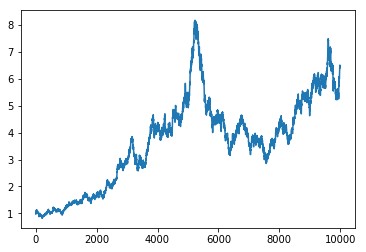

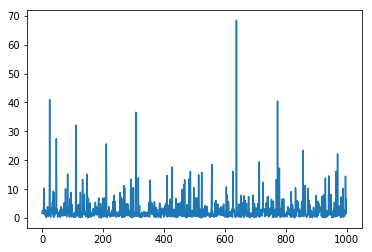

In [2]:
# Geometric Brownian Motion
# S_0 = 1
# S_t = \mu * S_t dt + \sigma * S_t dW_t
# Solution: S_0 * e^((\mu - \sigma^2/2)*t + \sigma*W_t)
# where W_t ~ N(0,t)

mu = 1
sigma = 1
x_0 = 1
T = 1

def A(x, t):
    return mu*x

def B(x, t):
    return sigma*x

n = 1000
tspan = np.linspace(0, T, 10001)
x_t = np.zeros((len(tspan), n))

for i in range(n):
    x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
    
# plot of sample path
plt.figure()
plt.plot(x_t[:,-1])

# plot of final distribution
plt.figure()
plt.plot(x_t[-1,:])

(array([0.01158244, 0.04198634, 0.16360194, 0.31272584, 0.36774242,
        0.31996486, 0.15346731, 0.05791219, 0.01303024, 0.00579122]),
 array([-2.68107096, -1.99037012, -1.29966928, -0.60896843,  0.08173241,
         0.77243325,  1.46313409,  2.15383493,  2.84453577,  3.53523661,
         4.22593746]),
 <a list of 10 Patch objects>)

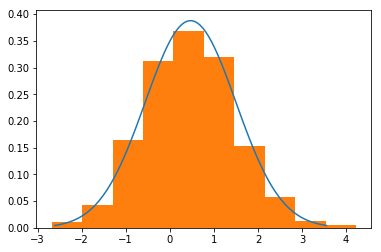

In [3]:
# Need to fit a log-normal of the form above
# ln(X_t) ~ N((\mu-\sigma^2/2)*t, \sigma^2)

y_t = np.log(x_t)

mu_T = np.mean(y_t[-1,:])
sigma_T = np.std(y_t[-1,:])

z = np.linspace(mu_T - 3*sigma_T, mu_T + 3*sigma_T, 100)
plt.plot(z, stats.norm.pdf(z, mu_T, sigma_T))
plt.hist(y_t[-1,:], density=True)

In [4]:
# need E[|X_T - X_T^\delta|] <= C_T(\delta)^\gamma
# Where the inside is a folded distribution that has mean noted below

mu_diff = 0 - mu_T
sigma_diff = math.sqrt(sigma**2 + sigma_T**2)

error = math.sqrt(2/math.pi)*sigma_diff*np.exp(mu_diff**2/(2*sigma_diff**2))+mu_diff*(1-2*stats.norm.pdf(-mu_diff/sigma_diff, 0, 1))

In [ ]:
# get plot of errors

errors = []
for n in range(1000,10001,100):
    tspan = np.linspace(0, T, n)
    x_t = np.zeros((len(tspan), n))

    for i in range(n):
        x_t[:, i] = SdeInt().Euler(A, B, x_0, tspan)
        
    y_t = np.log(x_t)

    mu_T = np.mean(y_t[-1,:])
    sigma_T = np.std(y_t[-1,:])
    mu_diff = 0 - mu_T
    sigma_diff = math.sqrt(sigma**2 + sigma_T**2)

    error = math.sqrt(2/math.pi)*sigma_diff*np.exp(mu_diff**2/(2*sigma_diff**2))+mu_diff*(1-2*stats.norm.pdf(-mu_diff/sigma_diff, 0, 1))
    errors.append(error)

plt.plot(list(range(1000,100,10001)), errors)